# Testing Data Analytics for Multiple parlay return simulated annueling (SA_MP)
* uses highest risk as optimization target 'Value" 
* tested using theoretical games generated by a script
* tested against a brute force search algorithm for correctness, which had to take much longer to run
* SA Cooling linear cooling scedulae used: temperature = temperature_init / (1 + (3 *countIter))
* SA Threshold decreased by 25% after each parlay returned to best grouping
* 'Offset' refers to number of "Neighbors" answer was away from perfect solution
* Initial Temperature used: 100

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
# Load CSV file into a DataFrame
df = pd.read_csv('SA_MP_testingData.csv')

# Display the DataFrame
df

,Test_ID,numGames,numParlays,runtime,temp_threshold,SA_Correctness,SA_Offset,SA_Best_Overlap
0,0,1,3,0.0212,0.129,1.00000,0,1
1,1,5,5,0.1997,0.107,1.00000,0,4
2,2,2,5,0.0539,0.148,1.00000,0,1
3,3,2,5,0.1814,0.045,1.00000,0,2
4,4,1,3,0.0393,0.069,1.00000,0,1
...,...,...,...,...,...,...,...,...
1145,1145,4,8,11.5303,0.002,1.00000,0,4
1146,1146,2,7,1.5995,0.007,1.00000,0,2
1147,1147,2,5,1.0106,0.008,1.00000,0,2
1148,1148,5,8,29.6966,0.001,1.00000,0,5


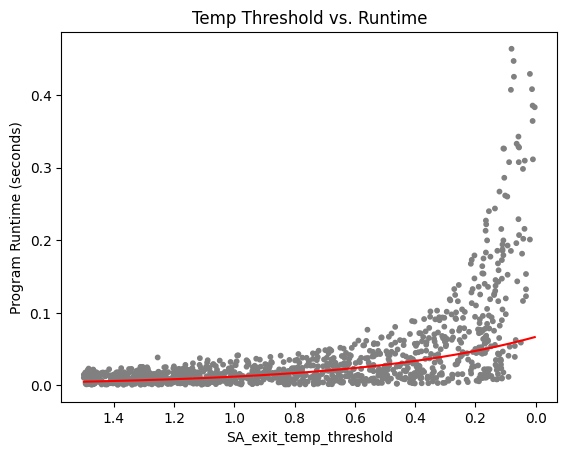

In [32]:
#exclude outliers
dfA = df[df['runtime'] <= 0.5]

# Select columns to plot
x = dfA['temp_threshold']
y = dfA['runtime']

# Get counts of each unique combination of x and y values
counts = dfA.groupby(['temp_threshold', 'runtime']).size().reset_index(name='count')

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts['temp_threshold'], y=counts['runtime'], s=counts['count']*10, color='grey')

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Program Runtime (seconds)')
plt.title('Temp Threshold vs. Runtime')

#create exponential best fit line
p = np.polyfit(x, np.log(y), 1)
a = np.exp(p[1])
b = p[0]

# Plot the exponential best-fit line
x_fit = np.linspace(x.min(), x.max(), 1000)
y_fit = a * np.exp(b * x_fit)
plt.plot(x_fit, y_fit, 'r-', label='Exponential Best Fit')

plt.gca().invert_xaxis()
# Show the graph
plt.show()

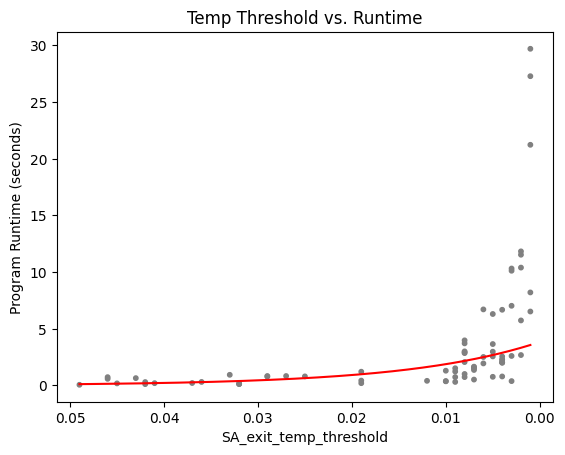

In [31]:
#exclude outliers
df2 = df[df['temp_threshold'] <= 0.05]

# Select columns to plot
x2 = df2['temp_threshold']
y2 = df2['runtime']

# Get counts of each unique combination of x and y values
counts2 = df2.groupby(['temp_threshold', 'runtime']).size().reset_index(name='count')

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts2['temp_threshold'], y=counts2['runtime'], s=counts2['count']*10, color='grey')

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Program Runtime (seconds)')
plt.title('Temp Threshold vs. Runtime')

#create exponential best fit line
p2 = np.polyfit(x2, np.log(y2), 1)
a2 = np.exp(p2[1])
b2 = p2[0]

# Plot the exponential best-fit line
x_fit2 = np.linspace(x2.min(), x2.max(), 1000)
y_fit2 = a2 * np.exp(b2 * x_fit2)
plt.plot(x_fit2, y_fit2, 'r-', label='Exponential Best Fit')

plt.gca().invert_xaxis()
# Show the graph
plt.show()

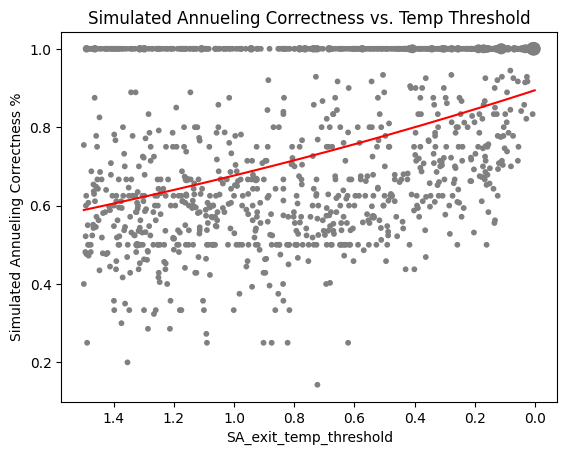

In [39]:
#exclude outliers
#df1 = df[df['SA_Correctness'] >= 0.85]
df1 = df

# Select columns to plot
x1 = df1['temp_threshold']
y1 = df1['SA_Correctness']

# Get counts of each unique combination of x and y values
counts1 = df1.groupby(['temp_threshold', 'SA_Correctness']).size().reset_index(name='count')

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts['temp_threshold'], y=counts['SA_Correctness'], s=counts['count']*10, label='thresh_v_Correct', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Simulated Annueling Correctness %')
plt.title('Simulated Annueling Correctness vs. Temp Threshold')

#create exponential best fit line
p1 = np.polyfit(x, np.log(y1), 1)
a1 = np.exp(p1[1])
b1 = p1[0]

# Plot the exponential best-fit line
x_fit1 = np.linspace(x1.min(), x1.max(), 1000)
y_fit1 = a1 * np.exp(b1 * x_fit1)
plt.plot(x_fit1, y_fit1, 'r-', label='Exponential Best Fit')


plt.gca().invert_xaxis()
# Show the graph
plt.show()

In [ ]:
#exclude outliers
df2 = df[df['temp_threshold'] <= 0.4]

# Select columns to plot
x2 = df2['temp_threshold']
y2 = df2['runtime']

# Get counts of each unique combination of x and y values
counts2 = df2.groupby(['temp_threshold', 'runtime']).size().reset_index(name='count')

# Create scatter plot with point sizes based on count values
plt.scatter(x=counts2['temp_threshold'], y=counts2['runtime'], s=counts2['count']*10, color='grey')

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('Program Runtime (seconds)')
plt.title('Temp Threshold vs. Runtime')

#create exponential best fit line
p2 = np.polyfit(x2, np.log(y2), 1)
a2 = np.exp(p2[1])
b2 = p2[0]

# Plot the exponential best-fit line
x_fit2 = np.linspace(x2.min(), x2.max(), 1000)
y_fit2 = a2 * np.exp(b2 * x_fit2)
plt.plot(x_fit2, y_fit2, 'r-', label='Exponential Best Fit')

plt.gca().invert_xaxis()
# Show the graph
plt.show()

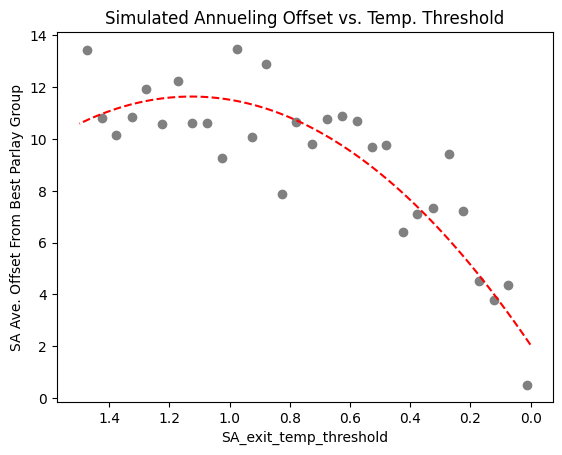

In [30]:
# Select columns to plot
x = df['temp_threshold']
y = df['SA_Offset']

# Set the bin size for the x axis
bins = np.arange(0,2.5,0.05)

# Get counts of each unique combination of x and y values
counts = df.groupby(['temp_threshold', 'SA_Offset']).size().reset_index(name='count')
averages_df = df.groupby(pd.cut(x, bins=bins)).mean().reset_index(drop=True)

# Set colors
color1 = 'grey'
line_color = 'yellow'

# Create scatter plot with point sizes based on count values
plt.scatter(x=averages_df['temp_threshold'], y=averages_df['SA_Offset'], label='thresh_v_Offset', color=color1)

# Add axis labels and title
plt.xlabel('SA_exit_temp_threshold')
plt.ylabel('SA Ave. Offset From Best Parlay Group')
plt.title('Simulated Annueling Offset vs. Temp. Threshold')

# Add quadratic best fit line
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, p(xp), "r--")

plt.gca().invert_xaxis()
# Show the graph
plt.show()